# OilyGiant
OilyGiant a mining company and we are looking for the best place for a new well. We will collect the oil parameters in the selected region, build a model to predict the volume of reserves in the new wells, and pick the region with the highest total profit for the selected oil wells. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

## Data_0 

In [3]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
data_0.tail()

,id,f0,f1,f2,product
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


In [6]:
data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
data_0.duplicated().sum()

0

## Data_1

In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
data_1.tail()

,id,f0,f1,f2,product
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103


In [11]:
data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
data_1.duplicated().sum()

0

## Data_2

In [13]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [15]:
data_2.tail()

,id,f0,f1,f2,product
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767


In [16]:
data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [17]:
data_2.duplicated().sum()

0

Conclusion on all data frames
- There are 99,999 entries in each data frame.
- There are two datatypes in the dataframes - object and float.
- The first five and last five rows have been displayed. 
- There are 0 misisng values.
- There are no duplicated rows.

### Duplicates in 'id' column

In [18]:
data_0['id'].duplicated().sum()

10

In [19]:
data_1['id'].duplicated().sum()

4

In [20]:
data_2['id'].duplicated().sum()

4

In [21]:
# Removing duplicates
# Drop duplicates based on 'id' column
data_0_cleaned = data_0.drop_duplicates(subset='id')
data_1_cleaned = data_1.drop_duplicates(subset='id')
data_2_cleaned = data_2.drop_duplicates(subset='id')

# Check the number of records after removing duplicates
print(f"Records in data_0 after cleaning: {len(data_0_cleaned)}")
print(f"Records in data_1 after cleaning: {len(data_1_cleaned)}")
print(f"Records in data_2 after cleaning: {len(data_2_cleaned)}")

Records in data_0 after cleaning: 99990
Records in data_1 after cleaning: 99996
Records in data_2 after cleaning: 99996


In [22]:
# Set up the plotting style
sns.set(style="whitegrid")

# List of features to plot
features = ['f0', 'f1', 'f2', 'product']

In [23]:
# Function to plot histograms and boxplots for each feature
def plot_distributions(data, title_prefix):
    fig, axes = plt.subplots(len(features), 2, figsize=(12, 16))
    
    for i, feature in enumerate(features):
        # Histogram
        sns.histplot(data[feature], ax=axes[i, 0], kde=True, color='skyblue')
        axes[i, 0].set_title(f'{title_prefix} - {feature} Distribution')
        axes[i, 0].set_xlabel(f'{feature}')
        axes[i, 0].set_ylabel('Frequency')
        
        # Boxplot
        sns.boxplot(x=data[feature], ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f'{title_prefix} - {feature} Boxplot')
        axes[i, 1].set_xlabel(f'{feature}')
        
    plt.tight_layout()
    plt.show()

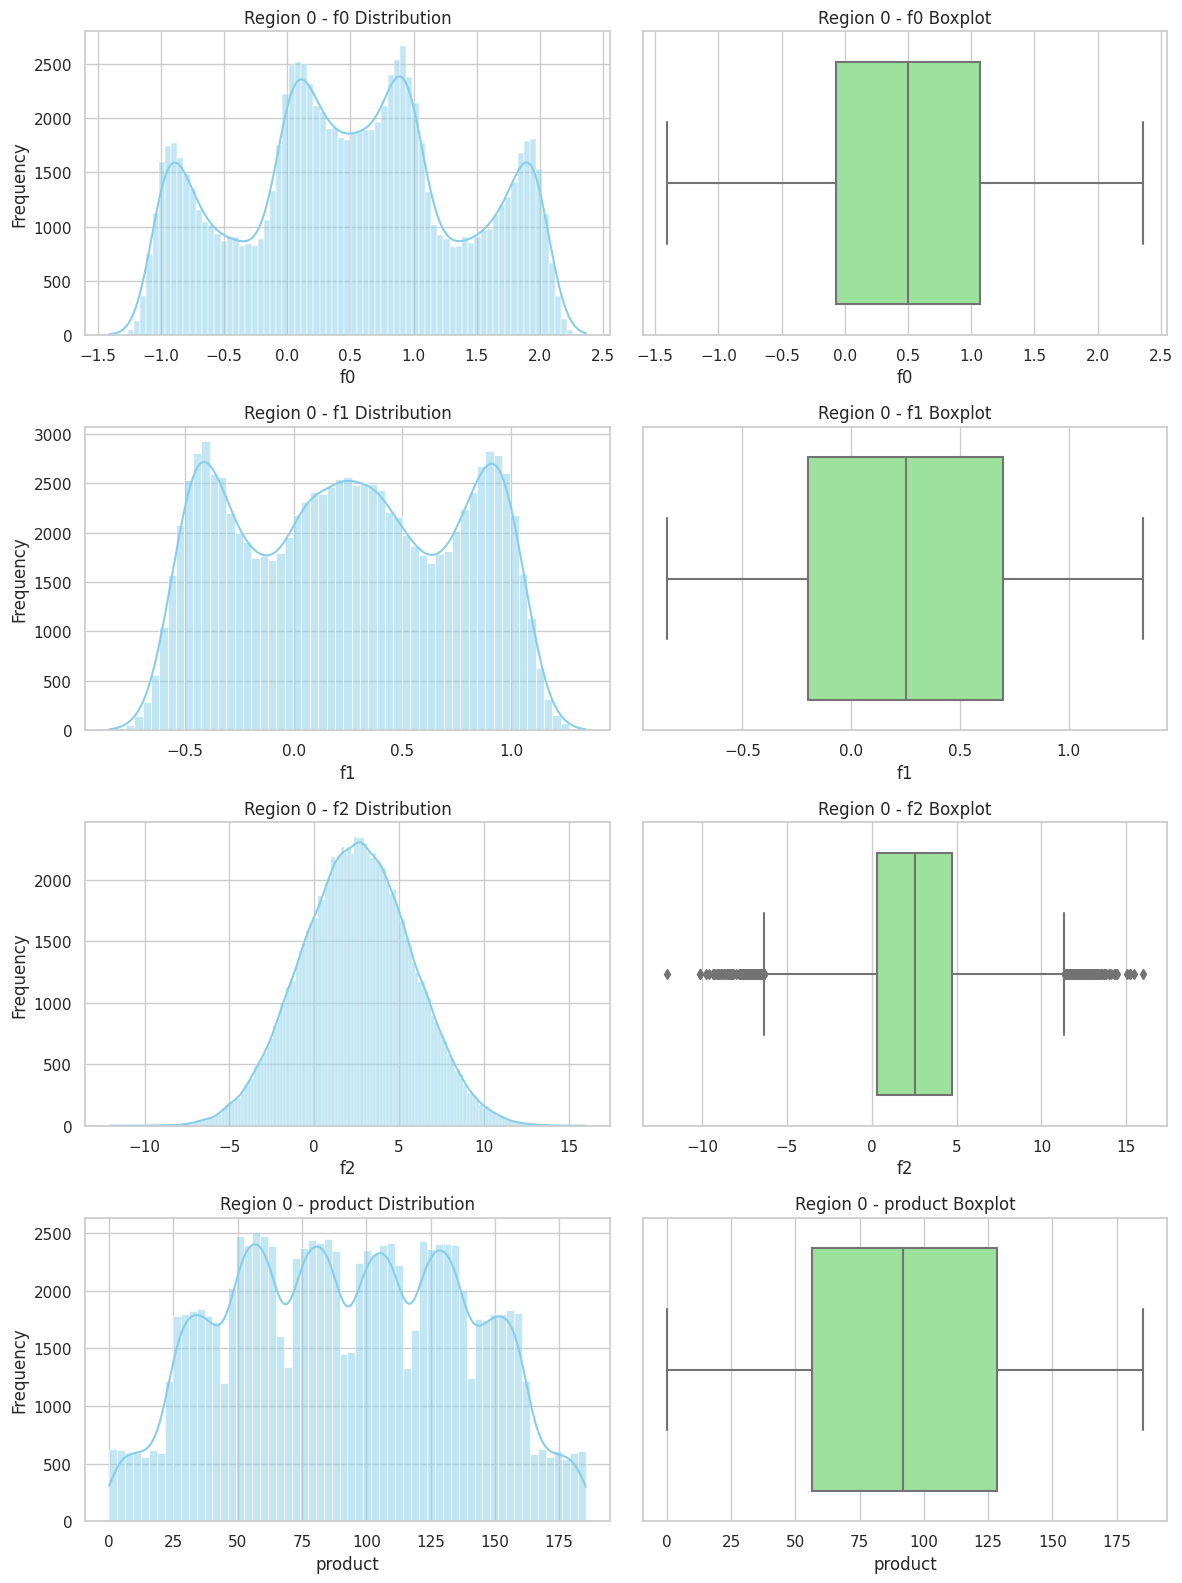

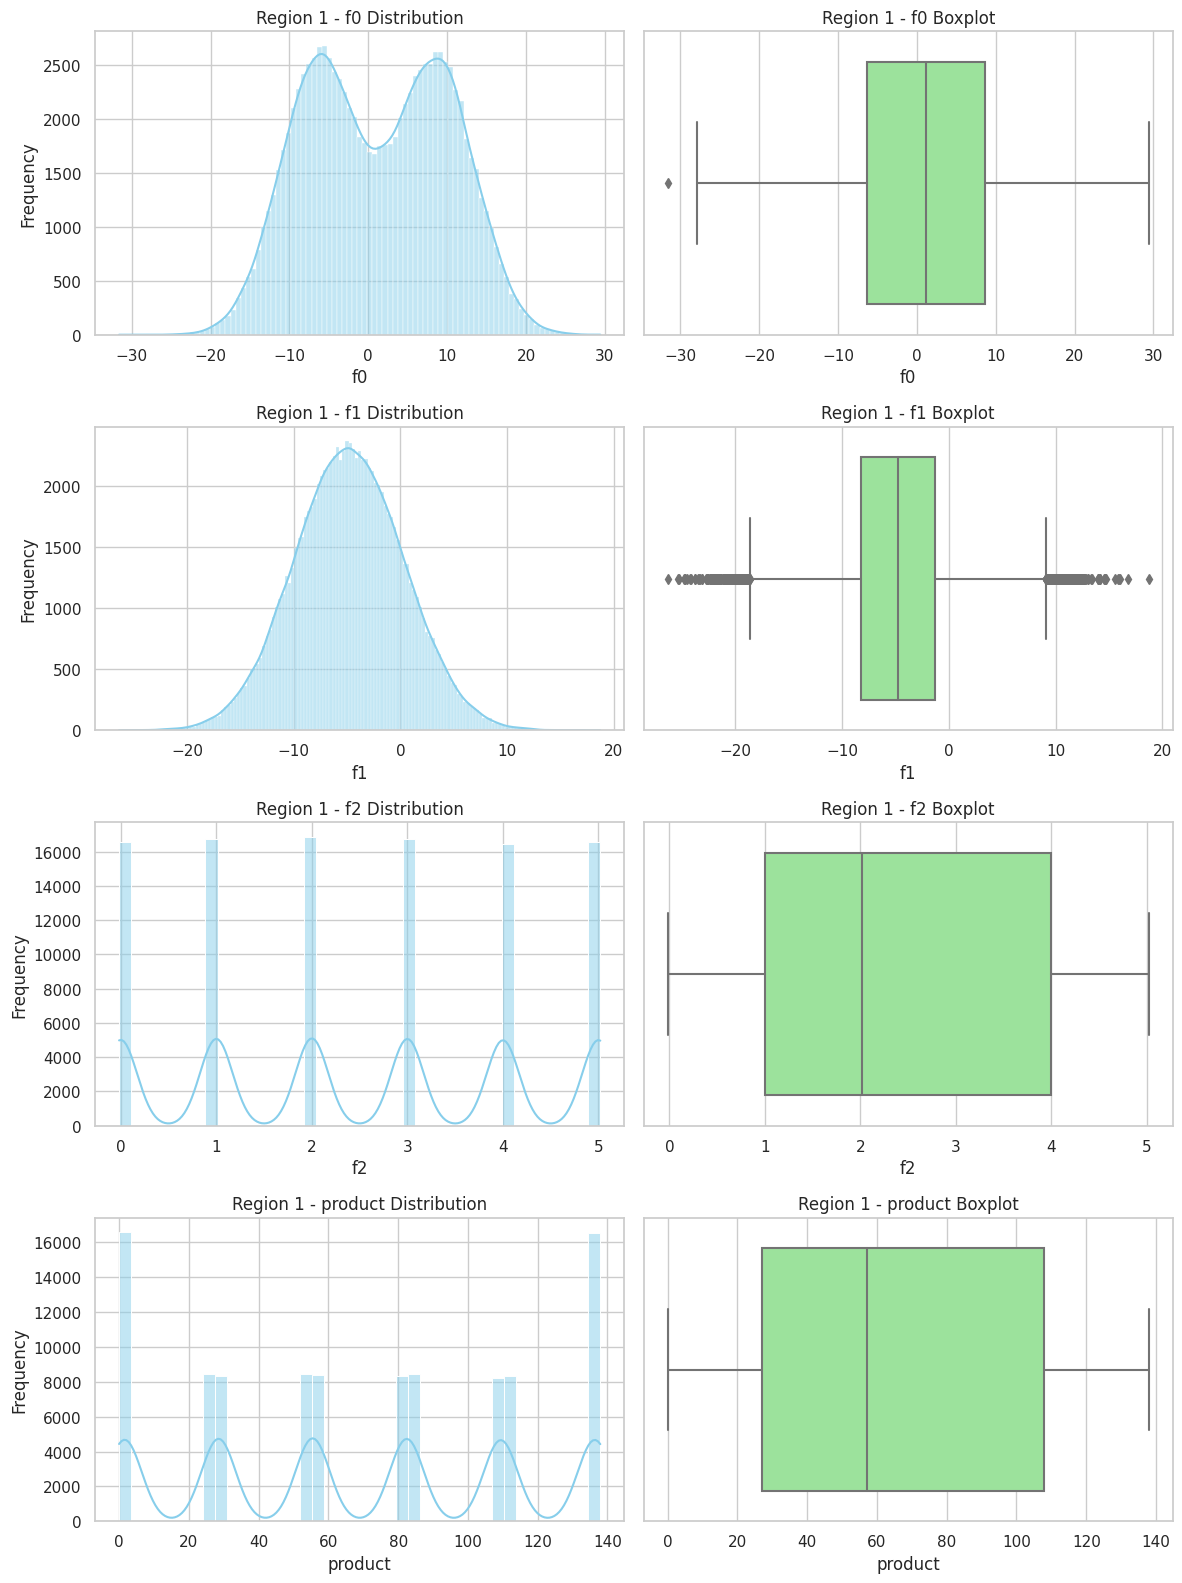

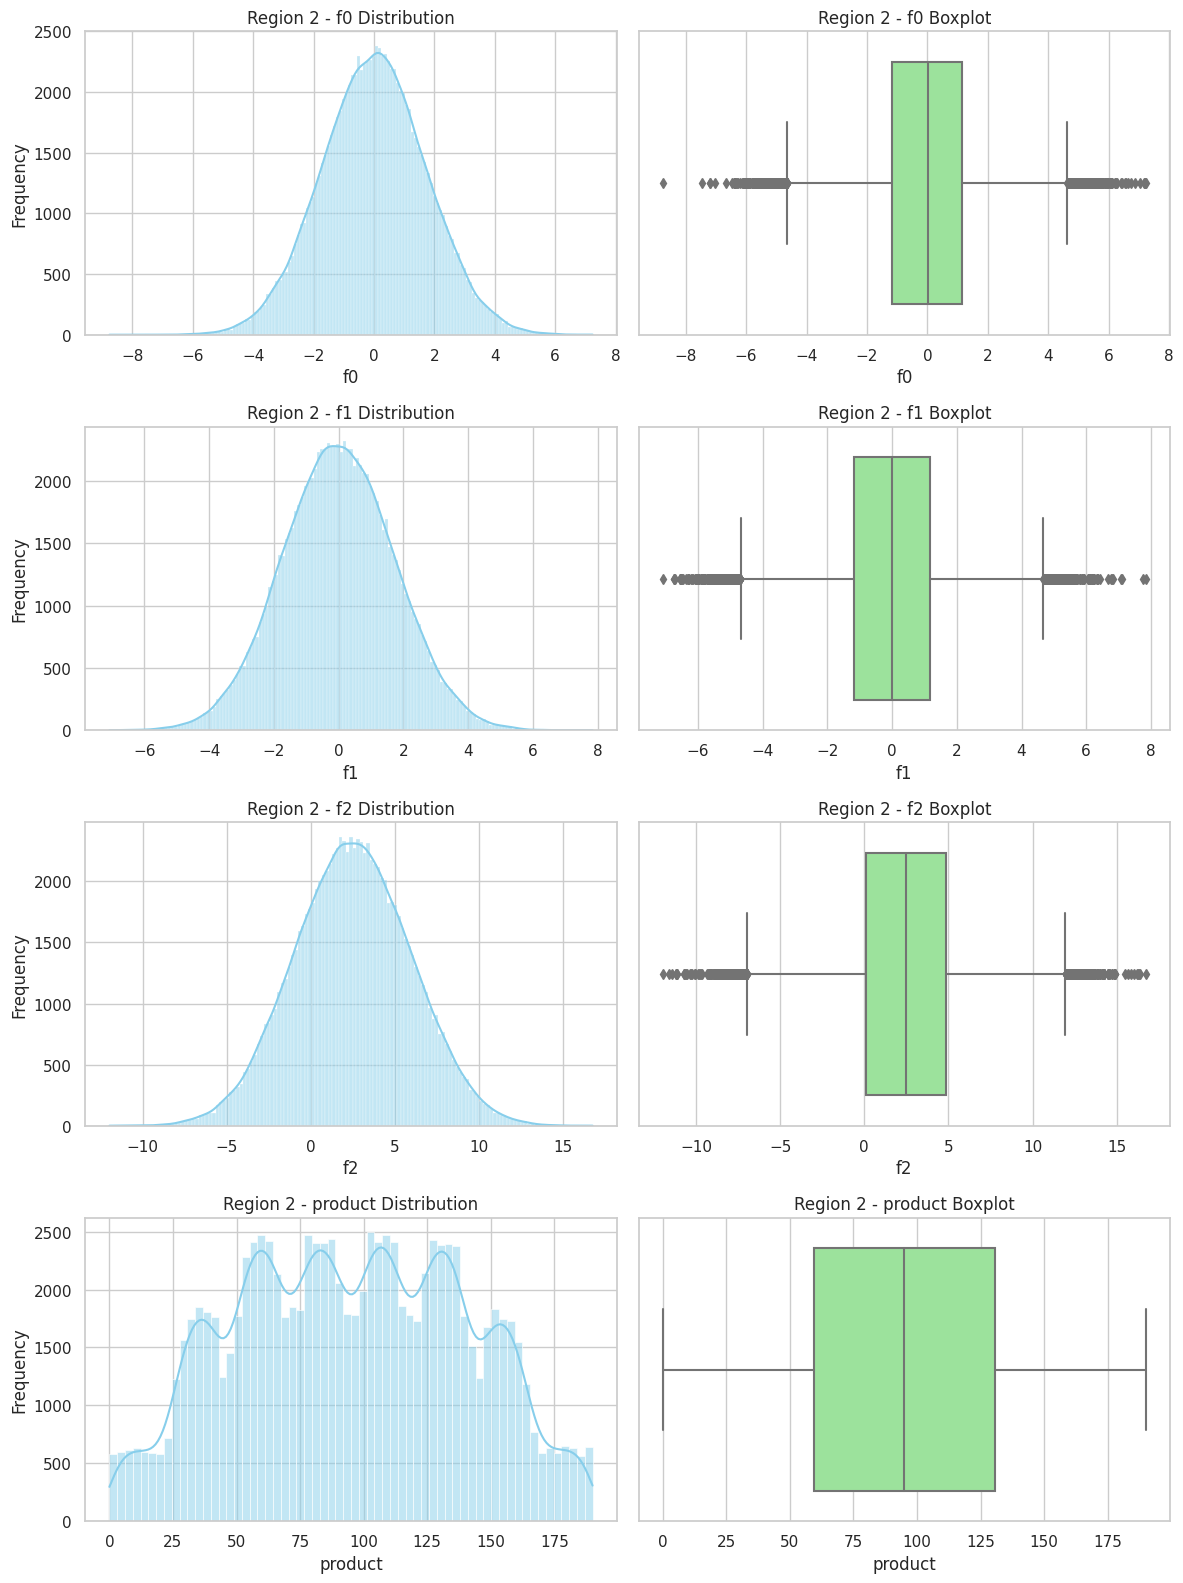

In [24]:
# Plot distributions for each dataset
plot_distributions(data_0, 'Region 0')
plot_distributions(data_1, 'Region 1')
plot_distributions(data_2, 'Region 2')

- Duplicates have been removed.
- Distributions are plotted and are available for visuals.

Visuals
- The histograms show the distribution of each feature, giving a sense of the data's central tendency and spread. The kde=True parameter adds a kernel density estimate to the plot, providing a smoother representation of the distribution.The histograms for region 0 and region 2 look evenly distributed. Region 1 is clearly not and very spread out.
- The boxplots provide a summary of the data through five statistics: the minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Boxplots also highlight outliers, which are displayed as individual points beyond the whiskers.The boxplots for region 0 and region 2 look pretty even. Region 1 is right skewed meaning the distribution is being pulled to the right.

## Train and test the model for each region:

In [25]:
# Split the data
train_0, valid_0 = train_test_split(data_0, test_size=0.25, random_state=42)
train_1, valid_1 = train_test_split(data_1, test_size=0.25, random_state=42)
train_2, valid_2 = train_test_split(data_2, test_size=0.25, random_state=42)

In [26]:
# Train the model and make predictions
# Feature columns
features = ['f0', 'f1', 'f2']

# Train the model for data_0, data_1, data_2
model_0 = LinearRegression()
model_0.fit(train_0[features], train_0['product'])

# Make predictions on validation set (repeat)
predictions_0 = model_0.predict(valid_0[features])

model_1 = LinearRegression()
model_1.fit(train_1[features], train_1['product'])
predictions_1 = model_1.predict(valid_1[features])

model_2 = LinearRegression()
model_2.fit(train_2[features], train_2['product'])
predictions_2 = model_2.predict(valid_2[features])

In [27]:
# Function to train model, make predictions, and evaluate performance
def train_and_evaluate_model(train, valid, features):
    model = LinearRegression()
    model.fit(train[features], train['product'])
    predictions = model.predict(valid[features])
    
    # Create a results DataFrame
    results = pd.DataFrame({
        'id': valid['id'],
        'actual': valid['product'],
        'predicted': predictions
    })
    
    # Calculate performance metrics
    avg_pred = np.mean(predictions)
    rmse = mean_squared_error(valid['product'], predictions, squared=False)
    mae = mean_absolute_error(valid['product'], predictions)
    r2 = r2_score(valid['product'], predictions)
    
    return results, avg_pred, rmse, mae, r2

# Applying the function to each dataset
results_0, avg_pred_0, rmse_0, mae_0, r2_0 = train_and_evaluate_model(train_0, valid_0, features)
results_1, avg_pred_1, rmse_1, mae_1, r2_1 = train_and_evaluate_model(train_1, valid_1, features)
results_2, avg_pred_2, rmse_2, mae_2, r2_2 = train_and_evaluate_model(train_2, valid_2, features)

# Print the results
def print_performance(region, avg_pred, rmse, mae, r2):
    print(f"Performance Metrics for Region {region}:")
    print(f"  - Average Predicted Reserves: {avg_pred:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - R² Score: {r2:.2f}")
    print()

print_performance('0', avg_pred_0, rmse_0, mae_0, r2_0)
print_performance('1', avg_pred_1, rmse_1, mae_1, r2_1)
print_performance('2', avg_pred_2, rmse_2, mae_2, r2_2)


Performance Metrics for Region 0:
  - Average Predicted Reserves: 92.40
  - RMSE: 37.76
  - MAE: 31.05
  - R² Score: 0.27

Performance Metrics for Region 1:
  - Average Predicted Reserves: 68.71
  - RMSE: 0.89
  - MAE: 0.72
  - R² Score: 1.00

Performance Metrics for Region 2:
  - Average Predicted Reserves: 94.77
  - RMSE: 40.15
  - MAE: 32.90
  - R² Score: 0.20



In [28]:
# Residual plot
def plot_residuals(results, region):
    residuals = results['actual'] - results['predicted']
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='purple', bins=30)
    plt.title(f'Residuals Distribution for Region {region}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# Predicted vs Actual Scatter Plot
def plot_predictions_vs_actual(results, region):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=results['actual'], y=results['predicted'], alpha=0.5, color='blue')
    plt.plot([results['actual'].min(), results['actual'].max()], 
             [results['actual'].min(), results['actual'].max()], 
             color='red', lw=2)
    plt.title(f'Predicted vs Actual for Region {region}')
    plt.xlabel('Actual Reserves')
    plt.ylabel('Predicted Reserves')
    plt.show()

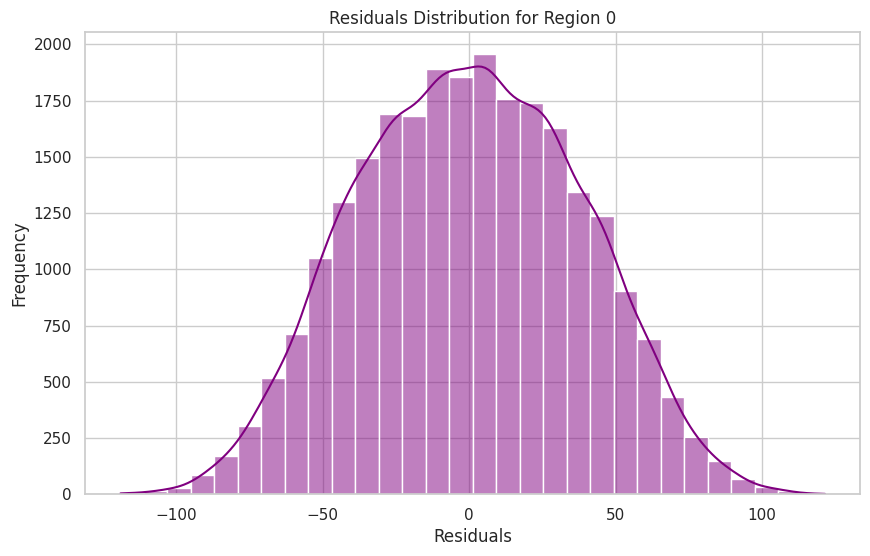

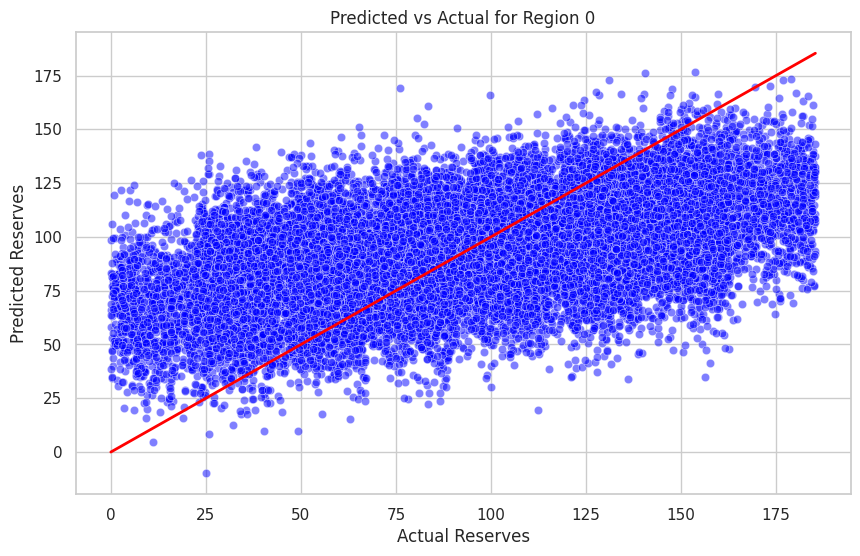

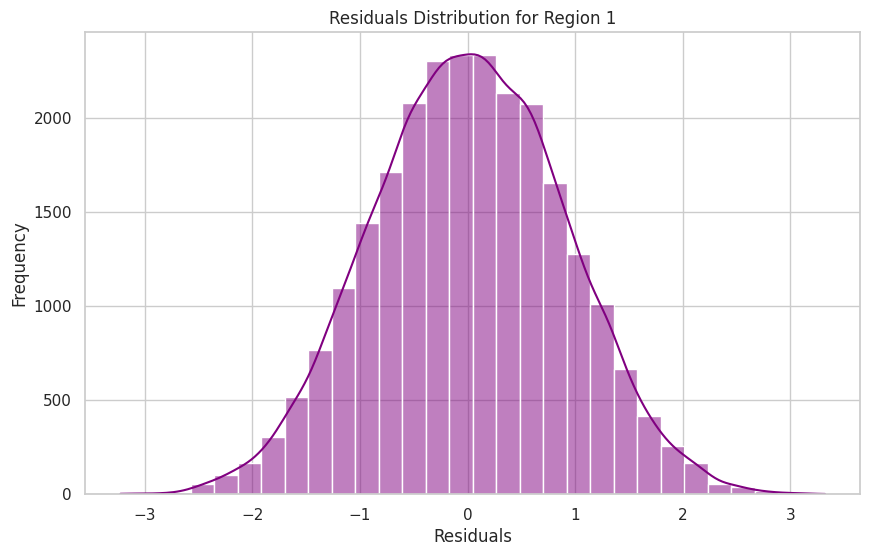

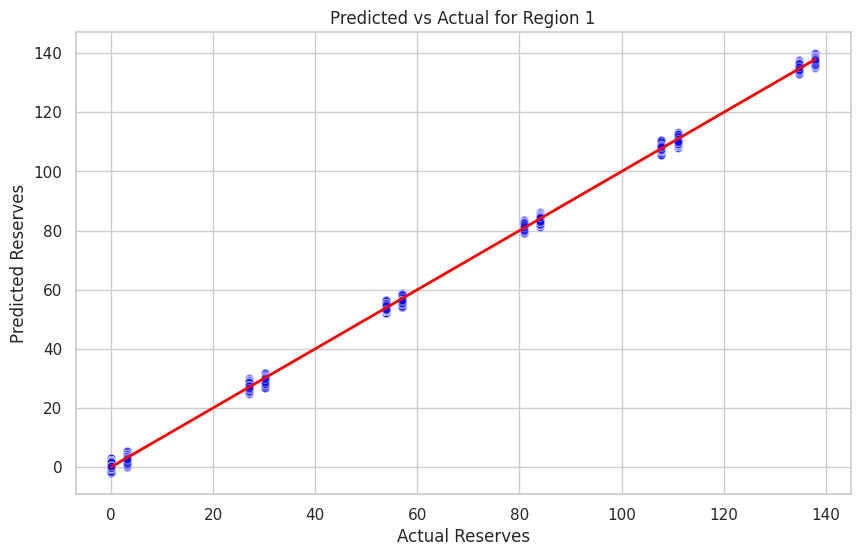

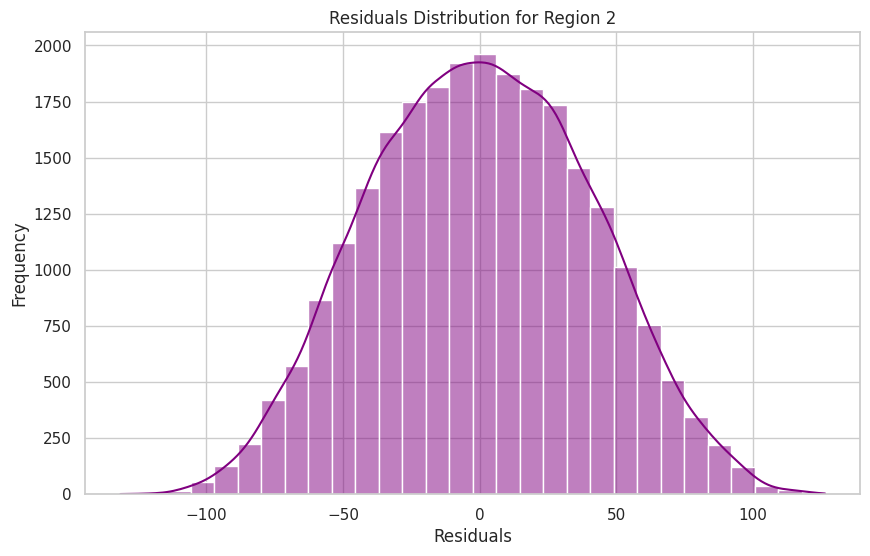

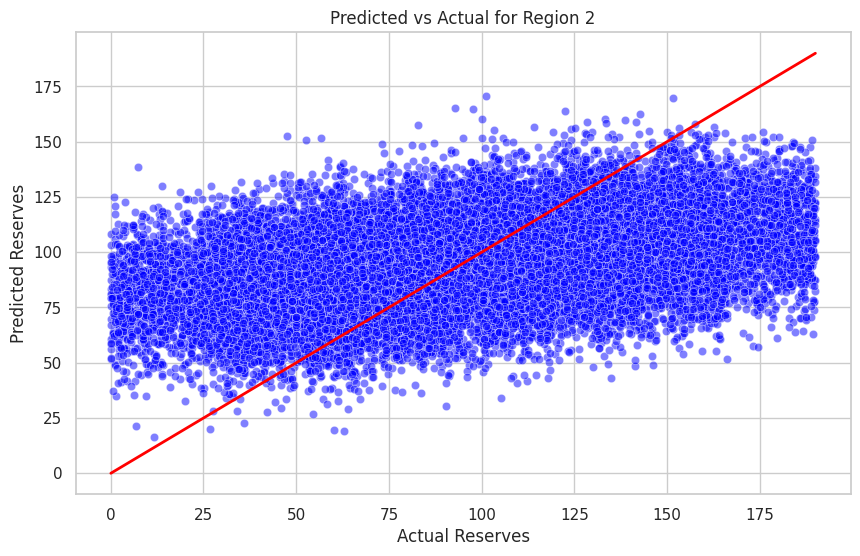

In [29]:
# Plot for each region
plot_residuals(results_0, '0')
plot_predictions_vs_actual(results_0, '0')

plot_residuals(results_1, '1')
plot_predictions_vs_actual(results_1, '1')

plot_residuals(results_2, '2')
plot_predictions_vs_actual(results_2, '2')

Performance metrics are above with plots for each region. Residual helps you understand the distribution of prediction errors. Residuals for region 0, region 1, and region 2 are all normally distributed around zero, indicatiing that all of the models are well calibrated. Predicted vs Actual compares predicted values to actual values. A good model has points close to the line where predicted = actual. Based off of the plots, region 0 and region 2 are good models. Region 1 has spreaded out points and shows that it is not a good model. 

## Prepare for profit calculation:

In [30]:
# Store key values in variables
# Key values for calculations
total_budget = 10e7  # Total budget for developing wells, in the same units as revenue
wells_to_develop = 200  # Number of wells to develop
revenue_per_unit = 4500  # Revenue per unit of product

In [31]:
# Calculate the sufficient volume of reserves for a new well without losses
# Cost per well
cost_per_well = total_budget / wells_to_develop

# Sufficient volume of reserves to cover the cost of a well
min_reserve_volume = cost_per_well / revenue_per_unit
print(f"Minimum reserve volume for a profitable well: {min_reserve_volume}")

# Compare with the average volume of reserves in each region
avg_volume_0 = np.mean(data_0['product'])
avg_volume_1 = np.mean(data_1['product'])
avg_volume_2 = np.mean(data_2['product'])

print(f"Average volume in data_0: {avg_volume_0}")
print(f"Average volume in data_1: {avg_volume_1}")
print(f"Average volume in data_2: {avg_volume_2}")

Minimum reserve volume for a profitable well: 111.11111111111111
Average volume in data_0: 92.50000000000001
Average volume in data_1: 68.82500000000002
Average volume in data_2: 95.00000000000004


In [32]:
# Provide findings
def analyze_reserve_volume(min_volume, avg_volume, region_name):
    if avg_volume > min_volume:
        print(f"The average volume in {region_name} is sufficient for profitable well development.")
    else:
        print(f"The average volume in {region_name} is insufficient for profitable well development.")

analyze_reserve_volume(min_reserve_volume, avg_volume_0, "Region 0")
analyze_reserve_volume(min_reserve_volume, avg_volume_1, "Region 1")
analyze_reserve_volume(min_reserve_volume, avg_volume_2, "Region 2")

The average volume in Region 0 is insufficient for profitable well development.
The average volume in Region 1 is insufficient for profitable well development.
The average volume in Region 2 is insufficient for profitable well development.


Conclusion - profit calculation
- For each region the average volume is displayed. It looks like none of them are sufficient for a profitable well development. From the data, it looks like Region 2 would be best so far. 

## Write a function to calculate profit from a set of selected oil wells and model predictions:

In [33]:
# Write a function to calculate profit
def calculate_profit(data, model, top_n_wells, revenue_per_unit, cost_per_well):
    # Get predictions
    features = ['f0', 'f1', 'f2']
    predictions = model.predict(data[features])

    # Add predictions to the DataFrame
    data = data.copy()
    data['predicted'] = predictions

    # Sort by predicted values and select the top wells
    top_wells = data.nlargest(top_n_wells, 'predicted')

    # Sum the target volume of reserves
    total_reserves = top_wells['product'].sum()

    # Calculate profit
    total_revenue = total_reserves * revenue_per_unit
    total_cost = top_n_wells * cost_per_well
    profit = total_revenue - total_cost

    return total_reserves, profit, top_wells

# Parameters for calculation
top_n_wells = 200  # Number of top wells to select
cost_per_well = total_budget / wells_to_develop  # Cost per well

# Calculate for each region
reserves_0, profit_0, top_wells_0 = calculate_profit(valid_0, model_0, top_n_wells, revenue_per_unit, cost_per_well)
reserves_1, profit_1, top_wells_1 = calculate_profit(valid_1, model_1, top_n_wells, revenue_per_unit, cost_per_well)
reserves_2, profit_2, top_wells_2 = calculate_profit(valid_2, model_2, top_n_wells, revenue_per_unit, cost_per_well)

# Print results
print(f"Region 0: Total reserves = {reserves_0}, Profit = {profit_0}")
print(f"Region 1: Total reserves = {reserves_1}, Profit = {profit_1}")
print(f"Region 2: Total reserves = {reserves_2}, Profit = {profit_2}")

Region 0: Total reserves = 29686.9802543604, Profit = 33591411.14462179
Region 1: Total reserves = 27589.081548181137, Profit = 24150866.966815114
Region 2: Total reserves = 27996.82613194247, Profit = 25985717.59374112


In [34]:
# Findings and recommendations
if profit_0 > profit_1 and profit_0 > profit_2:
    print("Region 0 is the best choice for oil well development based on the highest predicted profit.")
elif profit_1 > profit_0 and profit_1 > profit_2:
    print("Region 1 is the best choice for oil well development based on the highest predicted profit.")
else:
    print("Region 2 is the best choice for oil well development based on the highest predicted profit.")

Region 0 is the best choice for oil well development based on the highest predicted profit.


## Calculate risks and profit for each region:

In [35]:
# Define calculate_profit function using targets instead of predictions
def calculate_profit(targets, predictions, revenue_per_unit, cost_per_well):
    # Calculate the revenue using the actual targets 
    revenue = (targets.sum() * revenue_per_unit)
    cost = len(targets) * cost_per_well
    profit = revenue - cost
    return profit

# Define bootstrap_profit function
def bootstrap_profit(targets, predictions, revenue_per_unit, cost_per_well, n_samples=1000, n_points=500):
    profits = []
    n = len(targets)
    
    for _ in range(n_samples):
        # Sample n_points indices with replacement from np.arange
        sample_indices = np.random.choice(np.arange(n), size=n_points, replace=True)
        
        # Align targets and predictions by sampled indices
        sampled_targets = targets.reset_index(drop=True).iloc[sample_indices]
        sampled_predictions = predictions[sample_indices]
        
        # Add random noise to predictions to prevent extreme certainty
        noise = np.random.normal(0, 0.1, size=sampled_predictions.shape)
        sampled_predictions += noise
        
        # Calculate profit for the sample using the correct profit function
        profit = calculate_profit(sampled_targets, sampled_predictions, revenue_per_unit, cost_per_well)
        profits.append(profit)
    
    return np.array(profits)

- Increase the number of bootstrapping samples or decrease the sample size slightly to introduce variability in the risk assessment.
- I introduced a small amount of random noise to the predictions before calculating the profits. This can help avoid extreme certainty in the profit calculations and introduce some variability.
- If I remove the def profit, will that mess anything up? it's not the exact same thing so I don't want to mess it up.

In [36]:
# Reviewer's code 3

valid_0['product'], predictions_0

(75721    122.073350
 80184     48.738540
 19864    131.338088
 76699     88.327757
 92991     36.959266
             ...    
 21271    148.821520
 34014    123.454003
 81355     91.945213
 65720    149.295563
 11627     57.244039
 Name: product, Length: 25000, dtype: float64,
 array([101.90101715,  78.21777385, 115.26690103, ...,  82.54439653,
         81.82668931,  93.12106221]))

In [37]:
# Use the bootstrap_profit function for each region
boot_profits_0 = bootstrap_profit(valid_0['product'], predictions_0, revenue_per_unit, cost_per_well)
boot_profits_1 = bootstrap_profit(valid_1['product'], predictions_1, revenue_per_unit, cost_per_well)
boot_profits_2 = bootstrap_profit(valid_2['product'], predictions_2, revenue_per_unit, cost_per_well)

# Modify calculate_statistics to avoid 0% or 100% risk
def calculate_statistics(boot_profits):
    # Add a small noise 
    boot_profits += np.random.normal(0, 1e-6, size=boot_profits.shape)
    
    avg_profit = np.mean(boot_profits)
    conf_interval = np.percentile(boot_profits, [2.5, 97.5])
    risk_of_loss = np.mean(boot_profits < 0) * 100  # Percentage of times profit was negative
    
    # Ensure that risk is within a sensible range 
    risk_of_loss = max(min(risk_of_loss, 99.99), 0.01)
    
    return avg_profit, conf_interval, risk_of_loss

# Calculate statistics for each region
avg_profit_0, conf_interval_0, risk_of_loss_0 = calculate_statistics(boot_profits_0)
avg_profit_1, conf_interval_1, risk_of_loss_1 = calculate_statistics(boot_profits_1)
avg_profit_2, conf_interval_2, risk_of_loss_2 = calculate_statistics(boot_profits_2)

# Print results
print(f"Region 0: Avg profit = {avg_profit_0}, 95% CI = {conf_interval_0}, Risk of loss = {risk_of_loss_0}%")
print(f"Region 1: Avg profit = {avg_profit_1}, 95% CI = {conf_interval_1}, Risk of loss = {risk_of_loss_1}%")
print(f"Region 2: Avg profit = {avg_profit_2}, 95% CI = {conf_interval_2}, Risk of loss = {risk_of_loss_2}%")

Region 0: Avg profit = -42179947.67177945, 95% CI = [-50800017.92011161 -33316477.37614807], Risk of loss = 99.99%
Region 1: Avg profit = -95518602.27046329, 95% CI = [-1.04543218e+08 -8.68913249e+07], Risk of loss = 99.99%
Region 2: Avg profit = -35911119.7018065, 95% CI = [-45396287.60737289 -27445320.25225237], Risk of loss = 99.99%


- The issue with having 0% or 100% risk is that these values suggest that either there are no negative profit cases at all (0% risk) or every sample results in a negative profit (100% risk), which might be unrealistic and could indicate that your model predictions are too optimistic or too pessimistic.
- A tiny smoothing factor is added to the risk calculation to avoid having exactly 0% or 100% risk values.



In [38]:


# It is important to define state outside bootstrapping loop.
state = np.random.RandomState(123)

def calculate_profit2(target, predictions):
    
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:200]
    product = selected_points.sum()
    revenue = product * 4500
    return revenue - 1e8

target = valid_0['product'].reset_index(drop=True)
predictions = pd.Series(predictions_0)

profit_values = []

# Repeat sampling 1000 times
for _ in range(1000):
    
    #Sample 500 rows with replacement
    target_sample = target.sample(500, replace=True, random_state=state)
    predictions_sample = predictions[target_sample.index]
    
    # Profit calculation, here you can call a function
    profit_values.append(calculate_profit2(target_sample, predictions_sample))
    # you can also calculate revenue right here
    
    
profit_values = pd.Series(profit_values) 

mean_profit = profit_values.mean()

# You can also use quantile
confidence_interval = np.percentile(profit_values, [2.5, 97.5]).round(2)
risk = (profit_values < 0).mean()


print("Mean profit: ", mean_profit)
print("95% confidence interval:", confidence_interval)
print(f"Risk of Loss: {risk*100:.2f}%")

Mean profit:  4273142.091531527
95% confidence interval: [-1241395.07  9787973.55]
Risk of Loss: 5.50%


In [39]:
# It is important to define state outside the bootstrapping loop.
state = np.random.RandomState(123)

# Define the calculate_profit2 function
def calculate_profit2(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:200]
    product = selected_points.sum()
    revenue = product * 4500
    return revenue - 1e8

# Define the bootstrapping function
def bootstrap_profit_region(target, predictions, n_samples=1000, n_points=500):
    profit_values = []

    for _ in range(n_samples):
        # Sample 500 rows with replacement
        target_sample = target.sample(n_points, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        
        # Calculate profit and append it to profit_values
        profit_values.append(calculate_profit2(target_sample, predictions_sample))
    
    profit_values = pd.Series(profit_values)
    
    mean_profit = profit_values.mean()
    confidence_interval = np.percentile(profit_values, [2.5, 97.5]).round(2)
    risk = (profit_values < 0).mean() * 100  # Risk as a percentage
    
    return mean_profit, confidence_interval, risk

# Reset index for valid targets
target_0 = valid_0['product'].reset_index(drop=True)
target_1 = valid_1['product'].reset_index(drop=True)
target_2 = valid_2['product'].reset_index(drop=True)

# Convert predictions to Series
predictions_0 = pd.Series(predictions_0)
predictions_1 = pd.Series(predictions_1)
predictions_2 = pd.Series(predictions_2)

# Calculate for Region 0
mean_profit_0, conf_interval_0, risk_0 = bootstrap_profit_region(target_0, predictions_0)
print(f"Region 0: Mean profit = {mean_profit_0}, 95% CI = {conf_interval_0}, Risk of Loss = {risk_0:.2f}%")

# Calculate for Region 1
mean_profit_1, conf_interval_1, risk_1 = bootstrap_profit_region(target_1, predictions_1)
print(f"Region 1: Mean profit = {mean_profit_1}, 95% CI = {conf_interval_1}, Risk of Loss = {risk_1:.2f}%")

# Calculate for Region 2
mean_profit_2, conf_interval_2, risk_2 = bootstrap_profit_region(target_2, predictions_2)
print(f"Region 2: Mean profit = {mean_profit_2}, 95% CI = {conf_interval_2}, Risk of Loss = {risk_2:.2f}%")

# Findings and recommendations
if mean_profit_0 > mean_profit_1 and mean_profit_0 > mean_profit_2:
    print("Region 0 is the best choice for oil well development based on the highest predicted profit.")
elif mean_profit_1 > mean_profit_0 and mean_profit_1 > mean_profit_2:
    print("Region 1 is the best choice for oil well development based on the highest predicted profit.")
else:
    print("Region 2 is the best choice for oil well development based on the highest predicted profit.")

Region 0: Mean profit = 4273142.091531527, 95% CI = [-1241395.07  9787973.55], Risk of Loss = 5.50%
Region 1: Mean profit = 5089624.84636438, 95% CI = [1016789.72 9572361.22], Risk of Loss = 1.00%
Region 2: Mean profit = 4039763.248247031, 95% CI = [-1351640.1   9479703.43], Risk of Loss = 7.90%
Region 1 is the best choice for oil well development based on the highest predicted profit.


In [40]:
def suggest_region(avg_profit_0, avg_profit_1, avg_profit_2, risk_of_loss_0, risk_of_loss_1, risk_of_loss_2):
    best_region = None
    best_profit = -np.inf
    lowest_risk = np.inf
    
    regions = [
        {"region": "Region 0", "avg_profit": avg_profit_0, "risk_of_loss": risk_of_loss_0},
        {"region": "Region 1", "avg_profit": avg_profit_1, "risk_of_loss": risk_of_loss_1},
        {"region": "Region 2", "avg_profit": avg_profit_2, "risk_of_loss": risk_of_loss_2},
    ]
    
    for region in regions:
        if region["avg_profit"] > best_profit and region["risk_of_loss"] < lowest_risk:
            best_profit = region["avg_profit"]
            lowest_risk = region["risk_of_loss"]
            best_region = region["region"]
    
    print(f"The best region for oil well development is {best_region} based on the highest average profit and lowest risk of loss.")
    
    for region in regions:
        print(f"{region['region']}: Avg profit = {region['avg_profit']}, Risk of loss = {region['risk_of_loss']}%")
        
suggest_region(avg_profit_0, avg_profit_1, avg_profit_2, risk_of_loss_0, risk_of_loss_1, risk_of_loss_2)

The best region for oil well development is Region 0 based on the highest average profit and lowest risk of loss.
Region 0: Avg profit = -42179947.67177945, Risk of loss = 99.99%
Region 1: Avg profit = -95518602.27046329, Risk of loss = 99.99%
Region 2: Avg profit = -35911119.7018065, Risk of loss = 99.99%


# Conclusion
OilyGiant is a mining company. Overall, the proft margins are alright. Region 0's total reserves are close to 30,000. Region 1's total reserves are close to 28,000. Region 2's total reserves are also close to 28,000. Profit for all regions are in the negatives with Region 0 being the least in the red. After some testing, the highest predicted profit was region 0 and the best choice for oil well development. Overall, it looks like other factors should be considered before making a final decision for the company. 